In [1]:
base_path = '/Users/rudra/Tech/coursera_ml_specialization/supervised_ml/week1_course_materials/home/jovyan/work'
import sys
sys.path.insert(0, base_path)

In [4]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(f'{base_path}/deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [47]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(f"Shape of X_train is {X_train.shape}, Shape of y is {y.shape}")

Shape of X_train is (3, 4), Shape of y is (3,)


In [48]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"Shape of w_init is {w_init.shape}, Type of b_init is {type(b_init)}")

Shape of w_init is (4,), Type of b_init is <class 'float'>


Creating a decorator to calculate time taken by any function

In [49]:
import time

def time_calculator(func):
    def time_taken(*args, **kwargs):
        start = time.time()
        f_wb = func(*args, **kwargs)
        print(f"After using {func.__name__} function: \nShape of f_wb is {f_wb.shape}, Predictions are {f_wb}")
        end = time.time()
        print(f"Time taken is {end - start}")
    return time_taken

Single Prediction element by element

In [50]:
# Prediction for a single training example having multiple features
@time_calculator
def predict_single_loop(x, w, b):
    m = x.shape[0]
    f = 0
    for i in range(m):
        f += w[i] * x[i]
    f = f + b
    return f

In [51]:
x_vec = X_train[0, :]
print(f"Shape of x_vec is {x_vec.shape}, Values of x_vec are {x_vec}")

predict_single_loop(x_vec, w_init, b_init)


Shape of x_vec is (4,), Values of x_vec are [2104    5    1   45]
After using predict_single_loop function: 
Shape of f_wb is (), Predictions are 459.9999976194083
Time taken is 1.9073486328125e-05


Single Prediction using Vectorized code

In [52]:
@time_calculator
def predict(x, w, b):
    return np.dot(x, w) + b


In [53]:
x_vec = X_train[0, :]
print(f"Shape of x_vec is {x_vec.shape}, Values of x_vec are {x_vec}")

predict(x_vec, w_init, b_init)

Shape of x_vec is (4,), Values of x_vec are [2104    5    1   45]
After using predict function: 
Shape of f_wb is (), Predictions are 459.99999761940825
Time taken is 1.8835067749023438e-05


Computing cost for multiple variables

In [62]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

In [63]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"cost is {cost}")

cost is 1.5578904880036537e-12


Gradient Descent with multiple variables

In [68]:
def calculate_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i][j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [70]:
tmp_dj_dw, tmp_dj_db = calculate_gradient(X_train, y_train, w_init, b_init)
print(f"dj_dw at initial w and b: {tmp_dj_dw}")
print(f"dj_db at initial w and b: {tmp_dj_db}")

dj_dw at initial w and b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_db at initial w and b: -1.673925169143331e-06


In [71]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
   
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iterations {i:4d}: Cost = {J_history[-1]:8.2f}")
    
    return w, b, J_history


In [73]:
intial_w = np.zeros_like(w_init)
intial_b = 0.

iterations = 1000

alpha = 5.0e-7

In [78]:
w_final, b_final, J_hist = gradient_descent(X_train, y_train, intial_w, intial_b, compute_cost, calculate_gradient, alpha, iterations)

print(f"final w found by gradient descent is {w_final}, final b found by gradient descent is {b_final:0.3f}")

Iterations    0: Cost =  2529.46
Iterations  100: Cost =   695.99
Iterations  200: Cost =   694.92
Iterations  300: Cost =   693.86
Iterations  400: Cost =   692.81
Iterations  500: Cost =   691.77
Iterations  600: Cost =   690.73
Iterations  700: Cost =   689.71
Iterations  800: Cost =   688.70
Iterations  900: Cost =   687.69
final w found by gradient descent is [ 0.2   0.   -0.01 -0.07], final b found by gradient descent is -0.002


In [80]:
# Prediction on existing data using final w and b
m = X_train.shape[0]
for i in range(m):
    pred = np.dot(X_train[i], w_final) + b_final
    print(f"Prediced value = {pred:0.2f}, Actual value  = {y_train[i]}")

Prediced value = 426.19, Actual value  = 460
Prediced value = 286.17, Actual value  = 232
Prediced value = 171.47, Actual value  = 178


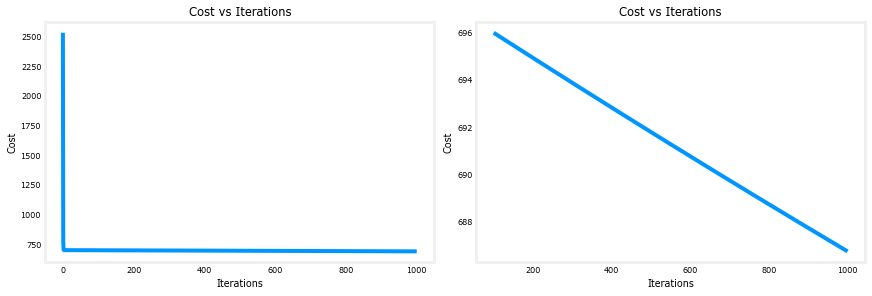

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title('Cost vs Iterations'); ax2.set_title('Cost vs Iterations')
ax1.set_xlabel('Iterations'); ax2.set_xlabel('Iterations')
ax1.set_ylabel('Cost'); ax2.set_ylabel('Cost')
plt.show()

Cost is still declining and our predictions are not very accurate. We will explore further in next sections.